In [144]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread("data/cv.bmp")[:,:,::-1]
w = img.shape[0]
h = img.shape[1]

In [145]:
def plot_side_by_side(img1, img2):
    fig = plt.figure(figsize=(10, 7))
    rows = 1
    columns = 2

    fig.add_subplot(rows, columns, 1)
    plt.imshow(img1)
    plt.axis('off')
    plt.title("Image 1")

    fig.add_subplot(rows, columns, 2)
    plt.imshow(img2)
    plt.axis('off')
    plt.title("Image 2")

## Original Image

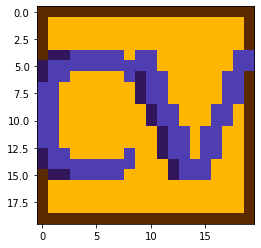

In [146]:
plt.imshow(img)

## RGB to YCbCr conversion

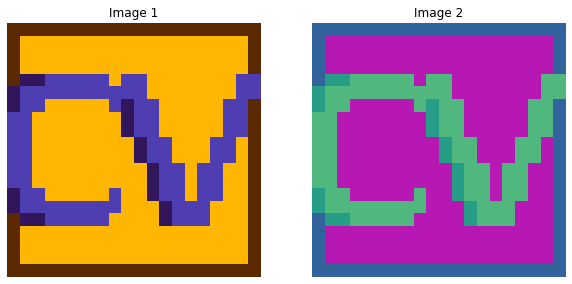

In [147]:
def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float32)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)

ycbcr = rgb2ycbcr(img)
plot_side_by_side(img, ycbcr)


## Downsampling/Chroma subsampling (4:2:0)

Text(0.5, 1.0, 'Subsampled (4:2:0)\nwith luma')

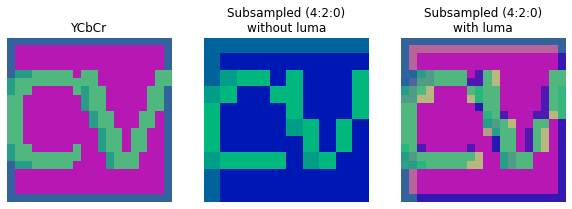

In [152]:
block_size = 2
def chroma_subsample(ycbcr):
    a = np.array(ycbcr)
    for y in range(0,h,block_size):
        for x in range(0,w,block_size):
            block = a[x:x+block_size,y:y+block_size,1:]
            a[x:x+block_size,y:y+block_size,1:] = np.full((block_size,block_size,2), block[0,0])
    return np.uint8(a)

css = chroma_subsample(ycbcr)

ycbcr_no_luma = np.copy(ycbcr)
ycbcr_no_luma[:,:,0] = 0 # set luma channel to 0 for better visualization

(x,y) = (0, 0)
size = 20 

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(ycbcr[x:x+size,y:y+size,:])
plt.axis('off')
plt.title("YCbCr")

fig.add_subplot(rows, columns, 2)
plt.imshow(chroma_subsample(ycbcr_no_luma)[x:x+size,y:y+size,:])
plt.axis('off')
plt.title("Chroma subsampled (4:2:0)\nwithout luma")

fig.add_subplot(rows, columns, 3)
plt.imshow(chroma_subsample(ycbcr)[x:x+size,y:y+size,:])
plt.axis('off')
plt.title("Chroma subsampled (4:2:0)\nwith luma")